# What is the Efficacy of Vaccines for COVID-19?

## An Analysis by Neil Hajela

**Published December 16th, 2022**

## Table of Contents:

1. Introduction
2. Data Extraction
    - A. WHO Data Set
    - B. Extracting the Cumulative Numbers & Vaccination Numbers from the WHO Data Sets
    - C. CDC Data Set
    - D. Extracting the Relevant Data from the CDC Data Set
3. Data Exploration
    - A. Exploration of the WHO Data Set
    - B. Exploration of the CDC Data Set
4. Conclusions

## 1. Introduction

The COVID-19 pandemic started in China in 2019, and rapidly spread globally in early 2020. This has been a historic event that has impacted all of our lives. With respect to the initial virus a vaccine was developed. While a large number of people in the U.S. were fully vaccinated (about 67%), a large number of people remain unvaccinated, unconvinced of the merits of a vaccination. There is also a significant amount of misinformation that has led people to reject being vaccinated. Elsewhere around the globe many people are yet to be vaccinated simply because the vaccine supply has trickled down from wealthier nations to poorer nations.

The net result of the reluctance of some in the wealthier nations to take the vaccine, and many in less affluent countries not having any access to vaccines has resulted in the COVID-19 virus mutating so that it is more infectious. While scientists work on getting vaccines and medications developed for new strains of COVID-19, this whack-a-mole approach is not necessarily going to end the COVID-19 pandemic, unless more people become convinced of the efficacy of vaccines. Therefore, convincing people of the efficacy of vaccines in effectively blunting the effects of COVID-19 is important, so that more people are vaccinated. Of course people also need to be convinced that vaccinations do not have any consequential side effects, but this was already well documented when the vaccines were undergoing trials.

This project will focus on the efficacy of vaccines, and how effective they might be both with respect to acting as a prophylactic for catching the disease and for lessening mortality. We are going to do this by looking at how vaccines have worked globally, as well as within the United States. To do this we are first going to collect global data from WHO (the World Health Organization) and U.S. data from the CDC (Center for Disease Control).

## 2. Data Extraction

## 2A. WHO Data Sets

The WHO data sets can be found at https://covid19.who.int/data and the CSV files we are interested in are:  https://covid19.who.int/WHO-COVID-19-global-table-data.csv and 
https://covid19.who.int/who-data/vaccination-data.csv

The first CSV file has cumulative numbers for each country with respect to both the number of cases of COVID-19 and mortality due to COVID-19 per 100,000 people. The second file has cumulative numbers for each country for the number of people vaccinated per 100 people. We are going to be interested in the behavior of the number of cases and mortality with a rising percentage level of people being vaccinated.

## 2B. Extracting the Cumulative Numbers and Vaccination Numbers from the WHO Data Sets

We first read in the data from https://covid19.who.int/WHO-COVID-19-global-table-data.csv which has the cumulative numbers we need.

In [787]:
import pandas as pd
cases = pd.read_csv("WHO Cumulative Cases.csv", index_col=False)
cases

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,646266987,8291.277705,3307314,42.431161,410104,6636278,85.140081,9411,0.120738,988
1,United States of America,Americas,98072469,29628.907000,448634,135.538000,0,1074367,324.580000,2934,0.886000,0
2,India,South-East Asia,44675247,3237.326000,1298,0.094000,152,530658,38.453000,20,0.001000,0
3,France,Europe,37530038,57703.579000,426405,655.611000,97037,156380,240.439000,644,0.990000,138
4,Germany,Europe,36860998,44321.818000,192665,231.661000,35907,159364,191.620000,114,0.137000,13
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Holy See,Europe,26,3213.844000,0,0.000000,0,0,0.000000,0,0.000000,0
234,Pitcairn Islands,Western Pacific,4,8000.000000,0,0.000000,0,0,0.000000,0,0.000000,0
235,Democratic People's Republic of Korea,South-East Asia,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0
236,Tokelau,Western Pacific,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,0


Next we drop data that we don’t need because we are only interested in the country name, and the number of cases and mortality due to COVID-19 per 100,000 people. We also drop the second row of the data set because it is a global data entry as opposed to a country entry.

In [788]:
cases = cases.drop(cases.columns[[1, 2, 4, 5, 6, 7, 9, 10, 11]],axis = 1)
cases = cases.drop(index=[0], axis=0)

In [789]:
cases

,Name,Cases - cumulative total per 100000 population,Deaths - cumulative total per 100000 population
1,United States of America,29628.907,324.580
2,India,3237.326,38.453
3,France,57703.579,240.439
4,Germany,44321.818,191.620
5,Brazil,16768.850,325.093
...,...,...,...
233,Holy See,3213.844,0.000
234,Pitcairn Islands,8000.000,0.000
235,Democratic People's Republic of Korea,0.000,0.000
236,Tokelau,0.000,0.000


Finally we sort the data set in ascending order by the name of the country.

In [790]:
cases = cases.sort_values('Name')
cases

,Name,Cases - cumulative total per 100000 population,Deaths - cumulative total per 100000 population
115,Afghanistan,531.086,20.147
100,Albania,11552.332,124.887
106,Algeria,618.336,15.692
209,American Samoa,14973.640,61.598
154,Andorra,61406.847,204.491
...,...,...,...
223,Wallis and Futuna,30366.352,62.244
200,Yemen,40.049,7.239
99,Zambia,1815.420,21.861
109,Zimbabwe,1744.986,37.826


Next we proceed to read in the vaccination numbers.

In [791]:
vaccinations = pd.read_csv("WHO vaccination-data.csv", index_col=False)
vaccinations

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,2022-12-05,12304901.0,11320910,31.609,29.081,10615628,27.270,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,NaN,NaN
1,Albania,ALB,EURO,REPORTING,2022-11-27,3017443.0,1341413,104.900,47.134,1269112,44.594,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,373263.0,13.116
2,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442.0,7840131,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,575651.0,1.313
3,American Samoa,ASM,WPRO,REPORTING,2022-08-23,111316.0,44885,201.670,81.318,41423,75.046,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,24160.0,43.770
4,Andorra,AND,EURO,REPORTING,2022-11-13,154367.0,57901,199.800,76.009,53485,70.211,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,42981.0,56.423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Viet Nam,VNM,WPRO,REPORTING,2022-12-01,264635919.0,90349305,271.872,92.820,85239151,87.570,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-08,6.0,57360122.0,58.928
225,Wallis and Futuna,WLF,WPRO,REPORTING,2022-07-26,16782.0,6592,149.226,58.616,6989,62.147,Moderna - Spikevax,2021-03-19,1.0,3201.0,28.463
226,Yemen,YEM,EMRO,REPORTING,2022-11-21,1239152.0,1003208,4.155,3.364,757669,2.540,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-04-20,11.0,58811.0,0.197
227,Zambia,ZMB,AFRO,REPORTING,2022-11-27,13405550.0,10842123,72.920,58.976,8401527,45.700,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-04-14,3.0,1002664.0,5.454


We will only need two columns from this data set, the country name, and the number of people vaccinated per 100 people. Whenever one deals with data it is good to make sanity checks, because some data may not make sense. This can occur for various reasons, but it is good to make sure that any data used actually makes sense. In this case we will discard any rows where the data shows that the number of vaccinated people per 100 people is greater than 100. Finally, because we will be shortly combining this data set with the cumulative number data set we extracted before, we will change the field name “Country” to “Name”.

In [792]:
final_cols = ['COUNTRY', 'PERSONS_FULLY_VACCINATED_PER100']
vaccinations = vaccinations.drop(columns=[col for col in vaccinations if col not in final_cols], axis=1)
vaccinations = vaccinations[vaccinations['PERSONS_FULLY_VACCINATED_PER100'] <= 100]
vaccinations.rename(columns = {'COUNTRY':'Name'}, inplace = True)
vaccinations

,Name,PERSONS_FULLY_VACCINATED_PER100
0,Afghanistan,27.270
1,Albania,44.594
2,Algeria,14.780
3,American Samoa,75.046
4,Andorra,70.211
...,...,...
224,Viet Nam,87.570
225,Wallis and Futuna,62.147
226,Yemen,2.540
227,Zambia,45.700


We may now combine the two data sets, and we want to sort the data set by persons fully vaccinated per 100 in ascending order, as we will want to see the effect this has on the number of cases and mortality for COVID-19 per 100,000 people.

In [793]:
combined = pd.merge(cases, vaccinations, on='Name', how='inner')
combined = combined.sort_values(by=['PERSONS_FULLY_VACCINATED_PER100'])

This gives us the WHO data set we want to work with.

In [794]:
combined

,Name,Cases - cumulative total per 100000 population,Deaths - cumulative total per 100000 population,PERSONS_FULLY_VACCINATED_PER100
62,Eritrea,287.304,2.904,0.000
32,Burundi,432.949,0.126,0.227
88,Haiti,297.074,7.542,2.082
217,Yemen,40.049,7.239,2.540
153,Papua New Guinea,519.245,7.477,3.405
...,...,...,...,...
37,Cayman Islands,47716.068,54.778,92.056
40,Chile,25963.339,328.250,92.552
160,Puerto Rico,35965.707,190.468,96.735
161,Qatar,16836.344,23.776,98.907


However, we only want to work with those countries that have a significant population. Therefore we want to only have the rows in the above table where we are dealing with the top 25 countries by population. To do this we go to the population data set below and this is ordered by population https://www.worldometers.info/world-population/population-by-country/ and web scrape the top 25 countries. Also we have to exercise some care in making sure that the names of the countries are consistent between the databases, which unfortunately they are not, and we have to take that into account.

In [795]:
import requests

In [796]:
page = requests.get('https://www.worldometers.info/world-population/population-by-country/')

In [797]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [798]:
# Find the world population table using BeautifulSoup
table = soup.find('tbody')

In [799]:
import re
matches = []
# Get all of the table rows
for i in table.findChildren('tr'):
    row = i.get_text()
    # Use a regular expression to match on the country names
    match = re.search(r'\d+ (\w+)(\s?[a-zA-Z]*)', row)
    second_word = match.group(2) if match.group(2) != ' ' else ''
    matches.append(match.group(1) + second_word)

In [800]:
countries = pd.DataFrame(matches)
top_25 = countries.head(28)
top_25 = top_25.rename(columns = {0:'Name'})

In [801]:
# Replacing inconsistencies in the names of the countries
top_25['Name'][2] = 'United States of America'
top_25['Name'][8] = 'Russian Federation'
top_25['Name'][14] = 'Viet Nam'
top_25['Name'][15] = 'Democratic Republic of the Congo'
top_25['Name'][17] = 'Iran (Islamic Republic of)'
top_25['Name'][20] = 'The United Kingdom'

We finally have the data set we are looking for.

In [802]:
final = pd.merge(top_25, combined, on='Name', how='inner')
final

,Name,Cases - cumulative total per 100000 population,Deaths - cumulative total per 100000 population,PERSONS_FULLY_VACCINATED_PER100
0,China,677.141,2.106,86.819
1,India,3237.326,38.453,68.912
2,United States of America,29628.907,324.580,68.157
3,Indonesia,2451.075,58.610,62.992
4,Pakistan,713.209,13.869,59.468
5,Brazil,16768.850,325.093,79.229
6,Nigeria,129.224,1.531,24.933
7,Bangladesh,1236.793,17.874,76.681
8,Russian Federation,14859.436,269.145,53.488
9,Mexico,5556.852,256.486,63.483


## 2C. CDC Data Set

The CDC data sets can be found at 
https://data.cdc.gov/Public-Health-Surveillance/Rates-of-COVID-19-Cases-or-Deaths-by-Age-Group-and/54ys-qyzm

The exported CSV file has a number of fields which are interesting, and is much more detailed than the WHO data set. This data set covers the period October 2021 through October 2022, and covers the period when the Omicron variant of COVID-19 was raging. It has the data for each week during the period, and is segmented by age. The segmentation by age consists of 0.5 to 4 years, 5 to 11 years, 12 to 17 years, 18 to 29 years, 30 to 49 years, 50 to 64 years, 65 to 79 years, and those that are more than 80 years. For each age period the data has the number of cases contracted, and deaths that occurred for both vaccinated and unvaccinated persons. 

We are only going to look at ages 18 on up, because the data set is incomplete for some earlier periods. We shall be interested in the number of cases and mortality for each age group for both vaccinated and unvaccinated persons and comparing them to see if vaccinated persons fared any better than unvaccinated persons.

## 2D. Extracting the Relevant Data from the CDC Data Set

We first read the data from the csv file.

In [803]:
us_cases = pd.read_csv("US Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Updated__Bivalent__Booster_Status.csv", index_col=False)
us_cases

,outcome,month,mmwr_week,age_group,vaccination_status,vaccinated_with_outcome,vaccinated_population,unvaccinated_with_outcome,unvaccinated_population,crude_vax_ir,crude_unvax_ir,crude_irr,age_adj_vax_ir,age_adj_unvax_ir,age_adj_irr,monthly_age_adj_vax_ir,monthly_age_adj_unvax_ir,monthly_age_adj_irr,continuity_correction
0,case,OCT 2021,202140,12-17,vaccinated,1997.0,3994831,20612,5255463.00,49.989599,392.201410,7.845660,NaN,NaN,NaN,NaN,NaN,NaN,0
1,case,OCT 2021,202140,12-17,vax with updated booster,NaN,0,20612,5255463.00,NaN,392.201410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,case,OCT 2021,202140,18-29,vaccinated,7993.0,9585145,34330,10199249.00,83.389453,336.593410,4.036403,NaN,NaN,NaN,NaN,NaN,NaN,0
3,case,OCT 2021,202140,18-29,vax with updated booster,NaN,0,34330,10199249.00,NaN,336.593410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,case,OCT 2021,202140,30-49,vaccinated,21683.0,18563065,52373,12162212.00,116.807219,430.620680,3.686593,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,death,SEP 2022,202239,65-79,vax with updated booster,0.0,444155,64,1126059.25,0.000000,5.683538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1714,death,SEP 2022,202239,80+,vaccinated,121.0,3277858,70,494181.90,3.691435,14.164825,3.837214,NaN,NaN,NaN,NaN,NaN,NaN,1
1715,death,SEP 2022,202239,80+,vax with updated booster,0.0,101423,70,494181.90,0.000000,14.164825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1716,death,SEP 2022,202239,all_ages,vaccinated,229.0,66804960,163,28210329.00,NaN,NaN,NaN,0.260476,1.322175,5.075985,0.380775,1.656418,4.350124,1


Since we are only interested in ages 18 on up and only interested in how many got COVID-19 who were vaccinated and unvaccinated, we eliminate the other data. 

In [804]:
us_cases = us_cases[us_cases['vaccination_status'] == 'vaccinated']
us_cases = us_cases[(us_cases['age_group'] != '0.5-4') &
                    (us_cases['age_group'] != '5-11') &
                    (us_cases['age_group'] != '12-17')]
final_cols = ['outcome', 'month', 'mmwr_week', 'age_group', 'vaccinated_with_outcome', 'unvaccinated_with_outcome']
us_cases = us_cases.drop(columns=[col for col in us_cases if col not in final_cols], axis=1)
us_cases

,outcome,month,mmwr_week,age_group,vaccinated_with_outcome,unvaccinated_with_outcome
2,case,OCT 2021,202140,18-29,7993.0,34330
4,case,OCT 2021,202140,30-49,21683.0,52373
6,case,OCT 2021,202140,50-64,16078.0,25127
8,case,OCT 2021,202140,65-79,12182.0,11060
10,case,OCT 2021,202140,80+,3868.0,2574
...,...,...,...,...,...,...
1708,death,SEP 2022,202239,30-49,3.0,9
1710,death,SEP 2022,202239,50-64,20.0,19
1712,death,SEP 2022,202239,65-79,83.0,64
1714,death,SEP 2022,202239,80+,121.0,70


## 3. Data Exploration

## 3A. Exploration of the WHO Data Set

We first get some relevant statistics for the WHO data set we had extracted in section 2B. We shall compute the relevant median and quartiles, and the interquartile range to see if there are any outliers.

In the case of numbers of people who got COVID-19 we have the following:

In [805]:
final.rename(columns = {'Cases - cumulative total per 100000 population':'Cases',
                        'Deaths - cumulative total per 100000 population': 'Deaths'}, inplace = True)
case_stats = final['Cases'].describe()
case_stats

count       25.000000
mean     12635.961440
std      16413.825547
min        105.752000
25%        713.209000
50%       5556.852000
75%      16768.850000
max      57703.579000
Name: Cases, dtype: float64

In [806]:
# Upper fence used to check for outliers
upper_fence = case_stats['75%'] + 1.5 * (case_stats['75%'] - case_stats['25%'])
upper_fence

40852.311499999996

In [807]:
outliers = final[final['Cases'] > upper_fence]
outliers

,Name,Cases,Deaths,PERSONS_FULLY_VACCINATED_PER100
17,Germany,44321.818,191.620,76.361
20,France,57703.579,240.439,77.477
21,Italy,41429.892,305.859,82.950


Germany, France and Italy were the only outliers. This is graphed next.

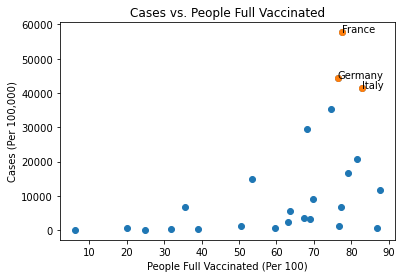

In [808]:
plt.scatter(final['PERSONS_FULLY_VACCINATED_PER100'], final['Cases'])
plt.xlabel('People Full Vaccinated (Per 100)')
plt.ylabel('Cases (Per 100,000)')
plt.title('Cases vs. People Full Vaccinated')
plt.scatter(outliers['PERSONS_FULLY_VACCINATED_PER100'], outliers['Cases'])
for index, row in outliers.iterrows():
    plt.annotate(row['Name'], xy=(row['PERSONS_FULLY_VACCINATED_PER100'], row['Cases']))
plt.show()

What this graph does show is that even when a high percentage of the population was vaccinated the number of cases did not necessarily go down. We do the same analysis as above for the mortality case.

In [809]:
death_stats = final['Deaths'].describe()
death_stats

count     25.000000
mean     118.139360
std      120.714479
min        1.531000
25%       17.874000
50%       47.840000
75%      240.439000
max      325.093000
Name: Deaths, dtype: float64

In [810]:
upper_fence = death_stats['75%'] + 1.5 * (death_stats['75%'] - death_stats['25%'])
upper_fence

574.2864999999999

In [811]:
final[final['Deaths'] > upper_fence]

,Name,Cases,Deaths,PERSONS_FULLY_VACCINATED_PER100


There were no outliers. We now do the graph of mortality against an increasing percentage of the population of the country being vaccinated.

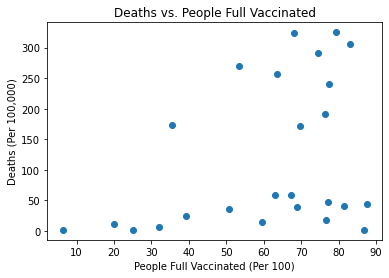

In [812]:
plt.scatter(final['PERSONS_FULLY_VACCINATED_PER100'], final['Deaths'])
plt.xlabel('People Full Vaccinated (Per 100)')
plt.ylabel('Deaths (Per 100,000)')
plt.title('Deaths vs. People Full Vaccinated')
plt.show()

Again there was no significant drop off in the mortality with an increasing percentage of the population being vaccinated.

## 3B. Exploration of the CDC Data Set

To see what is going on with the CDC data set, we will aggregate the data by month, treating each age group separately. Thus, for October 2021, the 18 to 29 year group appears 4 times because the data is weekly, and this will be aggregated for the month of October 2021, and the 18 to 29 year group will be kept separate from other age groups.

In [813]:
import matplotlib.pyplot as plt
labels = ['18-29', '30-49', '50-64', '65-79', '80+', 'all_ages']
# Our data variables p1-p6 correspond to each of the age groups.
p1_data = us_cases[us_cases['age_group'] == '18-29']
p2_data = us_cases[us_cases['age_group'] == '30-49']
p3_data = us_cases[us_cases['age_group'] == '50-64']
p4_data = us_cases[us_cases['age_group'] == '65-79']
p5_data = us_cases[us_cases['age_group'] == '80+']
p6_data = us_cases[us_cases['age_group'] == 'all_ages']

In [814]:
# Function used to filter our age group data (p1-p6) by either 'case' or 'death.'
def filter_outcome(data, value):
    data = data[data['outcome'] == value]
    return data

In [815]:
# Creates a new dataframe of month data for vaccinated and unvaccinated individuals.
# A single data point will be the sum of the number of cases/deaths for the month.
# The normalizing factor 'norm' is only used for our hypothesis test later.
def get_month_data(data, norm):
    months = []
    vacc = []
    unvacc = []
    for month in data['month'].unique():
        months.append(month)
        month_data = data[data['month'] == month]
        vacc.append(norm * month_data['vaccinated_with_outcome'].sum())
        unvacc.append(month_data['unvaccinated_with_outcome'].sum())
    temp_data = {'month': months,
                 'vacc': vacc,
                 'unvacc': unvacc}
    month_df = pd.DataFrame(temp_data)
    return month_df

We can now plot each group and compare the vaccinated versus the unvaccinated. 

In [816]:
# Function used to create all of the plots for vaccinated vs. unvaccinated individuals
# by either cases or deaths.
def create_plot(data, age):
    fig, ax = plt.subplots()
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    # Use normalizing factor of 1 when creating plots (no normalization)
    month_df = get_month_data(data, 1)
    plt.plot(month_df['month'], month_df['vacc'], linestyle="-", marker="o", label="Vaccinated")
    plt.plot(month_df['month'], month_df['unvacc'], linestyle="-", marker="o", label="Unvaccinated")
    plt.xlabel('Month')
    plt.ylabel('People who Had COVID')
    plt.title('People who got COVID vs. Time ' + age)
    plt.legend()
    plt.show()

Here are the results for each group, and we are first going to look at the comparison between the two groups where we are only looking at the situation where people have gotten COVID-19, but do not die.

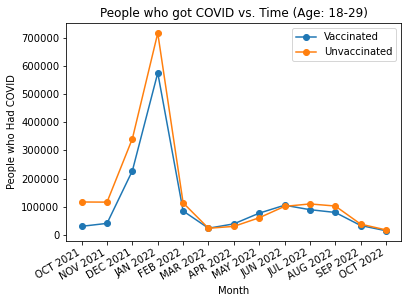

In [817]:
p1_data_c = filter_outcome(p1_data, 'case')
create_plot(p1_data_c, '(Age: 18-29)')

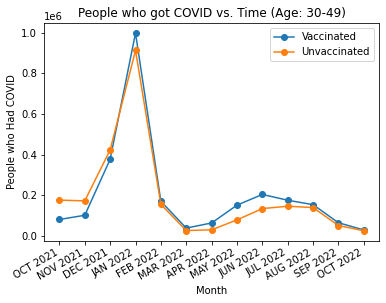

In [818]:
p2_data_c = filter_outcome(p2_data, 'case')
create_plot(p2_data_c, '(Age: 30-49)')

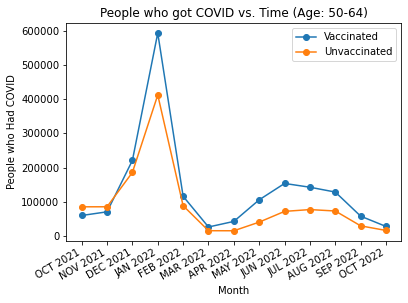

In [819]:
p3_data_c = filter_outcome(p3_data, 'case')
create_plot(p3_data_c, '(Age: 50-64)')

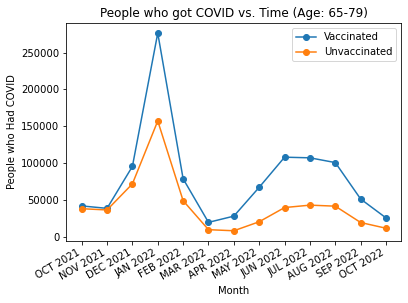

In [820]:
p4_data_c = filter_outcome(p4_data, 'case')
create_plot(p4_data_c, '(Age: 65-79)')

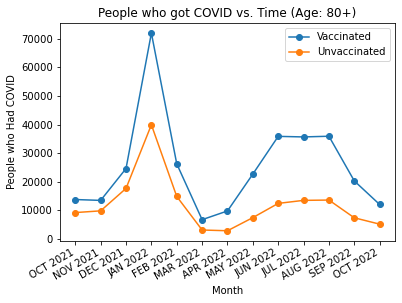

In [821]:
p5_data_c = filter_outcome(p5_data, 'case')
create_plot(p5_data_c, '(Age: 80+)')

Finally, when all the ages are combined we get the following.

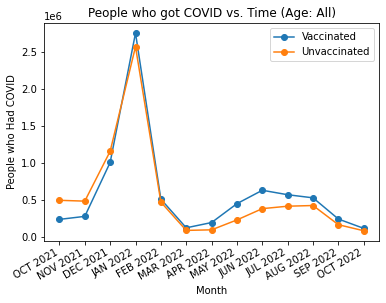

In [822]:
p6_data_c = filter_outcome(p6_data, 'case')
create_plot(p6_data_c, '(Age: All)')

At first glance it appears that the vaccines are not providing the appropriate prevention of disease. For example, in the graph above of 50 to 64 year olds, the blue graph (vaccinated persons) is higher than the orange graph (unvaccinated persons) during the peak omicron infection of January 2022. This is very misleading. The population of people in the U.S. that is vaccinated is approximately twice the number of people who are unvaccinated (67% versus 33%). Therefore, all other things being equal one would expect if the vaccines had no preventative value then the blue graph would be twice as high as the orange graph, since the population of the vaccinated is twice as large as the unvaccinated. However, when we look at the graph for all ages, we see that the orange graph and the blue graph have nearly the same peak, allowing one to conclude that the vaccine was quite effective in preventing infection.

Now let us look at what happens with respect to mortality. Again we look at the respective graphs.

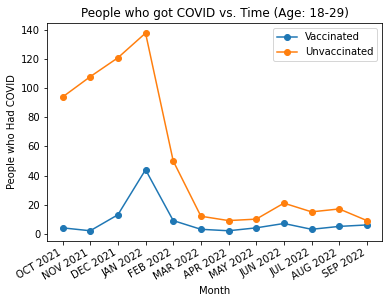

In [823]:
p1_data_d = filter_outcome(p1_data, 'death')
create_plot(p1_data_d, '(Age: 18-29)')

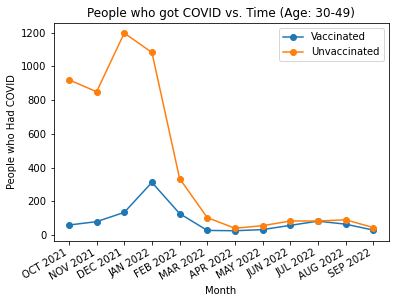

In [824]:
p2_data_d = filter_outcome(p2_data, 'death')
create_plot(p2_data_d, '(Age: 30-49)')

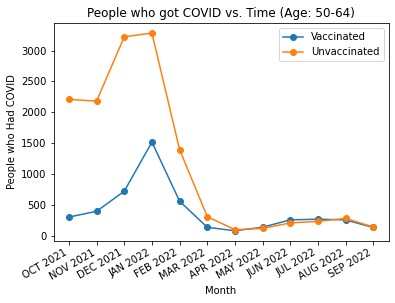

In [825]:
p3_data_d = filter_outcome(p3_data, 'death')
create_plot(p3_data_d, '(Age: 50-64)')

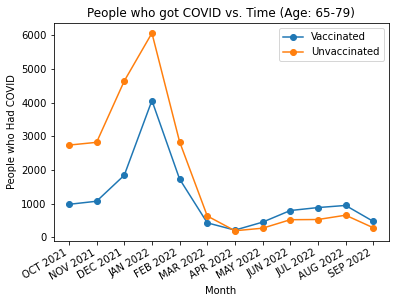

In [826]:
p4_data_d = filter_outcome(p4_data, 'death')
create_plot(p4_data_d, '(Age: 65-79)')

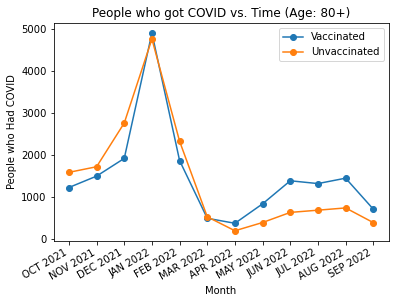

In [827]:
p5_data_d = filter_outcome(p5_data, 'death')
create_plot(p5_data_d, '(Age: 80+)')

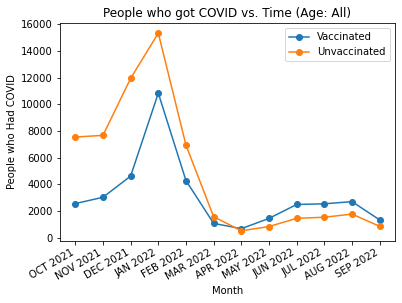

In [828]:
p6_data_d = filter_outcome(p6_data, 'death')
create_plot(p6_data_d, '(Age: All)')

It is in preventing mortality that the vaccines truly shine. The graph immediately above (all ages) has the orange graph (unvaccinated) during the peak omicron infection of January 2022 being higher than the blue graph (vaccinated) even though the population of the vaccinated is twice as much as the unvaccinated. Even when we compare 80+ year olds where the the two graphs (blue and orange) have almost the same peak during January 2022, it must be kept in mind that for 80+ year olds much more than twice the population of 80+ year olds was vaccinated, and that for those that are 80+ years old, the immune system is much weaker. So even in this situation where we would expect the vaccines to perform the worst, they are still working extremely well.

## 3C. Hypothesis testing for the CDC Data Set

Given how well the vaccines worked as shown in section 3B, it is reasonable to expect that in fact the means of the vaccinated population and the unvaccinated population are different, where we are considering all age groups and not segmenting them. We explicitly take into account that the vaccinated population is twice as large (as pointed out in section 3B) and then do a two group t-test - more precisely a Welch test since the variances of the two populations are different. The null hypothesis is that the means of the two populations are the same, and the alternative hypothesis is that the means are different. We set the significance level at 5%.

In [829]:
import scipy.stats as stats

In [830]:
# We specfically look at all age groups in the case of mortality (p6_data_d)
# Normalize by 0.5 since the vaccinated population is twice as large
test_data = get_month_data(p6_data_d, 0.5)
test_data

,month,vacc,unvacc
0,OCT 2021,1283.0,7556
1,NOV 2021,1520.0,7683
2,DEC 2021,2314.5,11953
3,JAN 2022,5424.0,15351
4,FEB 2022,2145.5,6949
5,MAR 2022,541.0,1580
6,APR 2022,343.5,530
7,MAY 2022,727.5,845
8,JUN 2022,1250.0,1463
9,JUL 2022,1275.5,1543


In [831]:
import numpy as np
print('Vaccinated Variance:', np.var(test_data['vacc']))
print('Unvaccinated Variance:', np.var(test_data['unvacc']))

Vaccinated Variance: 1678032.5190972222
Unvaccinated Variance: 22800103.88888889


In [832]:
stats.ttest_ind(a=test_data['vacc'], b=test_data['unvacc'], equal_var=False)

Ttest_indResult(statistic=-2.1921563258201457, pvalue=0.047781333054650175)

We obtain a p-value below 5%, so we reject the null hypothesis. The means of the two populations are different.

## 4. Conclusions

The WHO data from section 3A showed that the level of penetration of the vaccine in a country’s population did not seem to make much difference. The number of cases of COVID-19 and mortality levels remained stubbornly above a certain level that was approximately the same independently of the percentage of people in the country per 100 people who were vaccinated. 

One would have expected that if enough people took the vaccine that it might have provided herd immunity. In this case one would have expected to see a graph where with an increasing percentage of the number of people per 100 people who were vaccinated, the number of cases and mortality would be decreasing. 

The reason for this might be that the vaccine only provided protection to those who actually took it. Since we were looking at the top 25 countries by population, there were still enough people in the population that were unvaccinated who managed to contract the virus as it is quite infectious. As such, the mortality levels and case levels would have remained above a certain level even with an increasing percentage of people per 100 people that would have been vaccinated. Finally, certain countries such as Germany, France and Italy stood out as anomalies in terms of the number of cases. 

The CDC data in section 3B painted a much brighter picture. It clearly showed that those who took vaccines were better off than those who did not take the vaccine. At the height of the omicron wave of the COVID-19 virus, there were people from both the vaccinated and unvaccinated groups who got omicron. Even so, those who had taken the vaccine to prevent an infection had a smaller likelihood of getting the virus, and those who did take the vaccine were much better off in terms of their likelihood of dying.

A copy of all csv files used can be found at https://neil-codes.github.io